# Deterministic Model 03: Verification Data

In [2]:
# install libraries
#%pip install pandas
#%pip install numpy

In [3]:
# import pandas library
import pandas as pd
import numpy as np

### Read Data

In [4]:
# Read the file and assign it to variable "df_sim"
other_path = '../../data/sim/model_data.csv'
df_sim = pd.read_csv(other_path, header=0)

In [5]:
# show the first 5 rows using dataframe.head() method
print('The first 5 rows of the dataframe')
df_sim.head(5)

The first 5 rows of the dataframe


,x,y,z,dist,total_time
0,74,459,1284,2036.347957,39.870016
1,-90,4908,2217,2706.465038,42.842716
2,522,3074,26,1374.058223,36.932040
3,425,2247,2739,1504.644476,37.511332
4,516,3425,1590,1032.705670,35.417769


In [6]:
df_sim.describe()

,x,y,z,dist,total_time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1422.944700,1336.856500,1374.817600,2435.292585,41.639771
std,1440.916105,1512.725045,805.317921,1090.305852,4.836695
min,-99.000000,-99.000000,0.000000,64.101482,31.120954
25%,248.000000,202.000000,676.000000,1577.850196,37.836079
50%,599.500000,521.000000,1374.500000,2402.055568,41.492328
75%,2591.250000,2435.000000,2076.000000,3159.976186,44.854532
max,4599.000000,4949.000000,2749.000000,5026.495598,53.134580


In [7]:
# Read the file and assign it to variable "df_real"
other_path = '../../data/sim/model_data_real.csv'
df_real = pd.read_csv(other_path, header=0)


In [8]:
# show the first 5 rows using dataframe.head() method
print('The first 5 rows of the dataframe')
df_real.head(5)

The first 5 rows of the dataframe


,id,type_brick,type,rotation,x,y,z,layer,pallet,dist,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_calc,dist_linear
0,1,CORNER,2,90,220,95,0,1,1,2731,6,18,16,40,42.951555,2680.844083
1,2,HALF,3,90,220,252,0,1,1,2596,4,16,18,38,42.352683,2544.033019
2,4,BASIC,1,90,220,690,0,1,2,2350,6,14,16,36,41.261405,2176.809592
3,6,BASIC,1,90,220,1190,0,1,4,1804,6,14,16,36,38.839300,1796.802716
4,9,BASIC,1,90,220,1940,0,1,7,1454,8,12,24,44,37.286669,1378.767566


In [9]:
df_real.describe()

,id,type,rotation,x,y,z,layer,pallet,dist,start_to_verif,verif_to_dest,dest_to_end,total_time,total_time_calc,dist_linear
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,68.656863,1.303922,93.529412,1280.715686,999.303922,372.549020,2.490196,52.254902,2434.725490,8.254902,15.039216,18.343137,41.637255,41.637255,2431.983699
std,36.495353,0.793404,68.109508,1266.664204,1249.772588,267.332575,1.069330,35.606676,846.241898,3.204842,3.143189,6.560450,6.503296,3.754005,884.976162
min,1.000000,1.000000,0.000000,95.000000,95.000000,0.000000,1.000000,1.000000,853.000000,4.000000,7.000000,8.000000,33.000000,34.620579,855.350805
25%,39.250000,1.000000,0.000000,220.000000,220.000000,250.000000,2.000000,22.250000,1734.250000,6.000000,14.000000,14.000000,36.000000,38.529883,1719.106524
50%,66.500000,1.000000,90.000000,565.000000,220.000000,250.000000,2.000000,50.500000,2406.500000,8.000000,14.500000,16.000000,40.000000,41.512044,2453.914282
75%,100.750000,1.000000,180.000000,2283.750000,1533.750000,500.000000,3.000000,84.750000,2927.500000,8.000000,16.000000,21.500000,45.500000,43.823247,2990.944427
max,136.000000,4.000000,180.000000,4002.000000,4440.000000,750.000000,4.000000,120.000000,4439.000000,20.000000,24.000000,43.000000,63.000000,50.528397,4335.827949


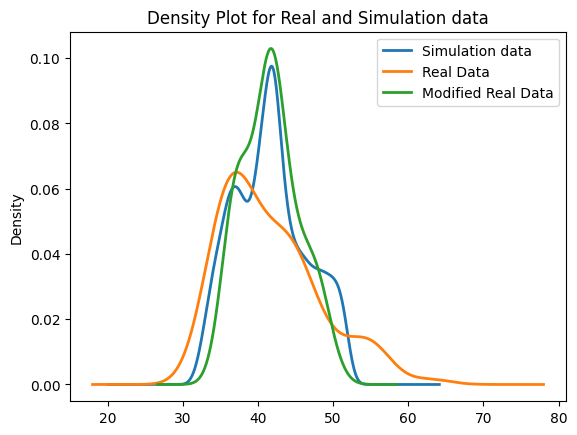

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot density
df_sim['total_time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Simulation data')
df_real['total_time'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Real Data')
df_real['total_time_calc'].plot.density(bw_method='scott', linestyle='-', linewidth=2, label='Modified Real Data')
plt.title('Density Plot for Real and Simulation data')
plt.legend()
plt.show()

### KS Test: One Side
Simulation Data vs. Normal distribution

In [11]:
### KS Test: One side
from scipy import stats

sample1 = df_sim['total_time'].to_numpy()

np.random.seed(122)
sample_size = 500
mean = df_sim['total_time'].mean()
std_dev = df_sim['total_time'].std()
sample2 = np.random.normal(mean, std_dev, sample_size)


ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov-Smirnov Statistic: {ks_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The two samples come from different distributions.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")

Kolmogorov-Smirnov Statistic: 0.05554999999999999
P-value: 0.09475552301110246
Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.


### KS Test: Two Side
Simulation Data vs. Real Data

In [12]:
### KS Test: Two side
from scipy import stats

sample1 = df_sim['total_time'].to_numpy()
sample2 = df_real['total_time'].to_numpy()

ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov-Smirnov Statistic: {ks_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The two samples come from different distributions.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")

Kolmogorov-Smirnov Statistic: 0.17172254901960787
P-value: 0.004492681629376993
Reject the null hypothesis. The two samples come from different distributions.


### KS Test: Two Side
Simulation Data vs. Modified Real Data

In [13]:
### KS Test: Two side
# Simulation Data vs. Modified Real Data
from scipy import stats

sample1 = df_sim['total_time'].to_numpy()
sample2 = df_real['total_time_calc'].to_numpy()

ks_statistic, p_value = stats.ks_2samp(sample1, sample2)

print(f'Kolmogorov-Smirnov Statistic: {ks_statistic}')
print(f'P-value: {p_value}')

# significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The two samples come from different distributions.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")

Kolmogorov-Smirnov Statistic: 0.0965343137254902
P-value: 0.2847117830146836
Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.


### Mean amd Std comparison

In [21]:
# Simulation Data vs. Real Data
mean_sim = df_sim['total_time'].mean()
mean_real = df_real['total_time'].mean()

std_sim = df_sim['total_time'].std()
std_real = df_real['total_time'].std()

mean_diff = abs(mean_sim - mean_real) / abs(mean_real)
std_diff = std_sim / std_real

print(f'Relative deviation (Means): {mean_diff}')
print(f'Variance Ratio (Std Dev): {std_diff}')

alpha = 0.05
if mean_diff > alpha:
    print('Reject the null hypothesis. Relative deviation is more than significance level (alpha).')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.')

Relative deviation (Means): 6.041903566900681e-05
Variance Ratio (Std Dev): 0.7437297726949088
Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.


In [22]:
# Simulation Data vs. Modified Real Data
mean_sim = df_sim['total_time'].mean()
mean_real = df_real['total_time_calc'].mean()

std_sim = df_sim['total_time'].std()
std_real = df_real['total_time_calc'].std()

mean_diff = abs(mean_sim - mean_real) / abs(mean_real)
std_diff = std_sim / std_real

print(f'Relative deviation (Means): {mean_diff}')
print(f'Variance Ratio (Std Dev): {std_diff}')

alpha = 0.05
if mean_diff > alpha:
    print('Reject the null hypothesis. Relative deviation is more than significance level (alpha).')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.')

Relative deviation (Means): 6.041903566900681e-05
Variance Ratio (Std Dev): 1.2884092069040023
Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.


### Parametric comparasing data

In [ ]:
from scipy import stats

def parametric_verification(
    s1: pd.Series,
    s2: pd.Series,
    alpha: float = 0.05,
    equal_var_test: str = "levene",
    normality_test: str = "shapiro"
):
    """
    Parametrická verifikace dvou pandas sérií.

    Testuje:
        - normalitu
        - shodu rozptylů
        - rozdíl středních hodnot

    Returns:
        dict
    """

    s1 = s1.dropna()
    s2 = s2.dropna()

    result = {}

    # ------------------------
    # 1. Normalita
    # ------------------------
    if normality_test == "shapiro":
        n1 = stats.shapiro(s1)
        n2 = stats.shapiro(s2)

    result["normality"] = {
        "s1_p": n1.pvalue,
        "s2_p": n2.pvalue,
        "normal": (n1.pvalue > alpha) and (n2.pvalue > alpha)
    }

    # ------------------------
    # 2. Shoda rozptylů
    # ------------------------
    if equal_var_test == "levene":
        var_test = stats.levene(s1, s2)

    result["variance"] = {
        "p_value": var_test.pvalue,
        "equal": var_test.pvalue > alpha
    }

    # ------------------------
    # 3. t-test
    # ------------------------
    equal_var = result["variance"]["equal"]

    t = stats.ttest_ind(s1, s2, equal_var=equal_var)

    result["ttest"] = {
        "t_stat": t.statistic,
        "p_value": t.pvalue,
        "different_mean": t.pvalue < alpha
    }

    # ------------------------
    # 4. Effect size (Cohen d)
    # ------------------------
    pooled_std = np.sqrt(
        ((s1.std() ** 2) + (s2.std() ** 2)) / 2
    )

    cohen_d = (s1.mean() - s2.mean()) / pooled_std

    result["effect_size"] = {
        "cohen_d": cohen_d
    }

    return result

In [20]:
res = parametric_verification(df_sim['total_time'], df_real['total_time_calc'])
res

c:\Users\usman\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


{'normality': {'s1_p': 1.6811306673840168e-45,
  's2_p': 0.05968077490959855,
  'normal': False},
 'variance': {'p_value': 0.0012115598189718986, 'equal': False},
 'ttest': {'t_stat': 0.006739543528865038,
  'p_value': 0.9946357349605397,
  'different_mean': False},
 'effect_size': {'cohen_d': 0.0005810792199019655}}

In [23]:
res = parametric_verification(df_sim['total_time'], df_real['total_time'])
res

{'normality': {'s1_p': 1.6811306673840168e-45,
  's2_p': 7.481435578862098e-06,
  'normal': False},
 'variance': {'p_value': 2.5377064397094324e-05, 'equal': False},
 'ttest': {'t_stat': 0.0039013126194947867,
  'p_value': 0.9968948629595772,
  'different_mean': False},
 'effect_size': {'cohen_d': 0.0004389680492612469}}

In [24]:
stats.mannwhitneyu(df_sim['total_time'], df_real['total_time_calc'], alternative='two-sided')

MannwhitneyuResult(statistic=1006393.0, pvalue=0.8159547753469945)

In [25]:
stats.mannwhitneyu(df_sim['total_time'], df_real['total_time'], alternative='two-sided')

MannwhitneyuResult(statistic=1086340.0, pvalue=0.2564613491679515)

### Celková interpretace

Série nemají stejné rozdělení (minimálně jedna není normální)

Série mají různý rozptyl

Střední hodnoty jsou statisticky i prakticky totožné

Rozdíl mezi nimi je:

* statisticky nevýznamný (p ≈ 0.995)

* prakticky nulový (d ≈ 0.0006)

Rozdělení obou sérií jsou stejná (nemají systematický posun)

#### Author/Date/Organization

Vjaceslav Usmanov, CTU in Prague

###### Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2026-01-20 | 1.1 | Vjaceslav Usmanov| added DM_03_Verification_Data.ipynb |
| 2026-02-12 | 1.2 | Vjaceslav Usmanov| changed DM_03_Verification_Data.ipynb |